<a href="https://colab.research.google.com/github/hrootscraft/customer-segmentation/blob/main/_1_DataAnalysis_BankCustomerSegmentationForMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim

Perform univariate and bivariate data analysis along with extracting descriptive statistics.

## Setup Dependencies

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d prakharrathi25/banking-dataset-marketing-targets

  0% 0.00/576k [00:00<?, ?B/s]
100% 576k/576k [00:00<00:00, 111MB/s]


In [ ]:
!unzip banking-dataset-marketing-targets.zip

Archive:  banking-dataset-marketing-targets.zip
  inflating: test.csv                
  inflating: train.csv               


## Exploratory Data Analysis (EDA)

### -- Data Description

A. Bank client data summary

1. **age** (numeric)
2. **job** : type of job (categorical: *admin, unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services*)
3. **marital** : marital status (categorical: *married, divorced, single*)
Note: *divorced* means divorced or widowed.
4. **education** (categorical: *unknown, secondary, primary, tertiary*)
5. **default**: has credit in default? (binary: *yes, no*)
6. **balance**: average yearly balance in euros (numeric)
7. **housing**: has housing loan? (binary: *yes,no*)
8. **loan**: has personal loan? (binary: *yes, no*)

B. Variables related to last contact of the current campaign

9. **contact**: contact communication type (categorical: *unknown, telephone, cellular*)
10. **day**: last day of the month when contacted (numeric)
11. **month**: last month when contacted (categorical: *jan, feb, mar, …, nov, dec*)
12. **duration**: last contact duration, in seconds (numeric)

C. Other attributes

13. **campaign**: number of contacts made during this campaign for this client (numeric, includes last contact)
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. **previous**: number of contacts made before this campaign for this client (numeric)
16. **poutcome**: outcome of the previous marketing campaign (categorical: *unknown, other, failure, success*)

D. Output variable (desired target):
17. **y**: has the client subscribed to a term deposit? (binary: *yes, no*)

### -- Cursory Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
traindf = pd.read_csv("train.csv",sep=";")
traindf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# testdf = pd.read_csv("test.csv",sep=";")
# testdf

In [ ]:
def report(df):
    cols = []
    data_types = []
    unique_values = []
    n_unique_values = []

    for col in df.columns:
        cols.append(col)
        data_types.append(df[col].dtypes)
        unique_values.append(df[col].unique()[:5])
        n_unique_values.append(df[col].nunique())

    return pd.DataFrame({'Column': cols, 'data_type': data_types, 'unique_values': unique_values, 'n_unique_values': n_unique_values})

In [ ]:
report(traindf)

,Column,data_type,unique_values,n_unique_values
0,age,int64,"[58, 44, 33, 47, 35]",77
1,job,object,"[management, technician, entrepreneur, blue-co...",12
2,marital,object,"[married, single, divorced]",3
3,education,object,"[tertiary, secondary, unknown, primary]",4
4,default,object,"[no, yes]",2
5,balance,int64,"[2143, 29, 2, 1506, 1]",7168
6,housing,object,"[yes, no]",2
7,loan,object,"[no, yes]",2
8,contact,object,"[unknown, cellular, telephone]",3
9,day,int64,"[5, 6, 7, 8, 9]",31


In [ ]:
# Remove white spaces
traindf.columns = traindf.columns.str.replace(' ', '')

### -- Univariate Analysis

#### A. Categorical Features

In [ ]:
import plotly.express as px

In [ ]:
cat_cols = traindf.select_dtypes(include='object').columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

##### i. Pie Chart - Frequency Distribution

In [ ]:
# temp_df = traindf.job.value_counts().reset_index().rename(columns={'index':'Type'})
# temp_df

In [ ]:
# fig = px.pie(temp_df, values='job', names='Type')
# fig.update_traces(textfont_size=18, textposition='inside',textinfo='percent+label')
# fig.update_layout(title_text='Job Distribution',showlegend=False)
# fig.show()
# del temp_df

In [ ]:
# def pie_cat_ft(col):
#   temp_df = traindf[col].value_counts().reset_index().rename(columns={'index':'Type'})
#   fig = px.pie(temp_df,values=col,names='Type')
#   fig.update_traces(textfont_size=18, textposition='inside',textinfo='percent+label')
#   fig.update_layout(title_text=f'{col} Distribution',showlegend=False)
#   fig.show()
#   del temp_df

In [ ]:
# for col in cat_cols:
#   pie_cat_ft(col)

##### ii. Bar Chart - Frequency Distribution

In [ ]:
# ## same information shown by pie chart is now shown with bar chart with clear visibility
# def bar_cat_ft(col):
#     temp_df = traindf[col].value_counts().reset_index().rename(columns={'index': 'Type', col: 'Count'})

#     total = temp_df['Count'].sum()
#     temp_df['Percentage'] = round((temp_df['Count'] / total) * 100,2)

#     text_values = [f'{val}%' for val in temp_df['Percentage']]
#     fig = px.bar(temp_df, y='Type', x='Count', text=text_values,
#                  title=f'{col} Distribution', color='Type',
#                  labels={'Count': 'Value Count', 'Percentage': 'Percentage (%)'})

#     fig.update_traces(textfont_size=18, textposition='outside')
#     fig.update_layout(showlegend=False, xaxis=dict(title='Value Count'), yaxis=dict(categoryorder='total ascending'))
#     fig.show()
#     del temp_df

In [ ]:
# for col in cat_cols:
#   bar_cat_ft(col)

**Inferences**

1. The user base of the bank comprises mainly of secondary educated people and the rest 50% has the split of ~30% tertiary (highly) educated followed by ~15% primary (basic) educated people. The ~4% user segment has an undefined education, maybe they did not fill the filed or they're uneducated.
2. Blue-collar and management folks hold an equal weightage of ~21% in the user base followed by ~13% admins and technicians each.
3. ~60% account holders are married, about 28% are single and rest 12% are divorced.
4.  98% people have their credits in place while a menial 2% have defaulted.
5. 56% people have a housing loan and 84% people have a personal loan.
6. For the current marketing campaign, 65% people were contacted on their cells whereas a 29% was communicated with an unknown form of communication (might be emails or the data is not provided). 6% were contacted via telephones.
7. In the current campaign, 30% people were contacted in May followed by a comparable amount of people contacted in July, August and June. Marketing campaign was at it's lowest when they contacted only a 0.5% people in December. Again a little more of 1% to 1.5% were contacted in March, September and October.
8. ~82% of result of the previous marketing campaign remains unknown. A success rate of only 3% people have responded positively to the campaign and 11% people responded negatively.
9. 88% of customers have subscribed to term deposit but remaining 12% have not.

#### B. Numerical Features

In [ ]:
num_cols = traindf.select_dtypes(include="int64").columns.to_list()
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# since df.mean(), df.corr(), ... will throw a warning when they have categorical fts, let's create a view of the dataframe with only numerical fts
numdf = traindf[num_cols]
# numdf

##### i. Mean, Median, Mode

In [ ]:
# Descriptive Statistics
print(f'Value of numerical features below which 25% of each of that feature data resides: \n{numdf.quantile(q=0.25)}\n')
print(f'Value of numerical features below which 50% of each of that feature data resides: \n{numdf.quantile(q=0.5)}\n')
print(f'Value of numerical features below which 75% of each of that feature data resides: \n{numdf.quantile(q=0.75)}\n')

Value of numerical features below which 25% of each of that feature data resides: 
age          33.0
balance      72.0
day           8.0
duration    103.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

Value of numerical features below which 50% of each of that feature data resides: 
age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
Name: 0.5, dtype: float64

Value of numerical features below which 75% of each of that feature data resides: 
age           48.0
balance     1428.0
day           21.0
duration     319.0
campaign       3.0
pdays         -1.0
previous       0.0
Name: 0.75, dtype: float64



In [ ]:
print(f'Mean of the numerical features is \n{numdf.mean()}\n')
print(f'Median of the numerical features is \n{numdf.median()}\n')
print(f'Mode of the numerical features is \n{numdf.mode()}\n')

Mean of the numerical features is 
age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

Median of the numerical features is 
age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

Mode of the numerical features is 
   age  balance  day  duration  campaign  pdays  previous
0   32        0   20       124         1     -1         0



In [ ]:
# Summary of Descriptive Statistics
numdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### ii. Histogram & KDE

In [ ]:
## Plot a numerical ft's histogram/kde along with its mean,median,mode lines
col = 'balance'
mean,median,mode = numdf[col].agg(['mean','median',lambda x: x.mode().iloc[0]])
print(f"For the feature {col}: its \nmean is {mean}, \nmedian is {median} \nmode is {mode}")

For the feature balance: its 
mean is 1362.2720576850766, 
median is 448.0 
mode is 0.0


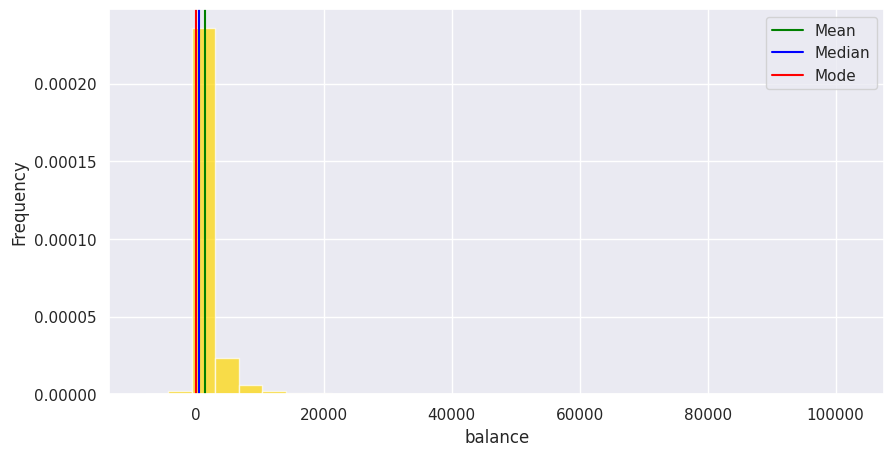

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(10,5))
plt.hist(numdf[col], color='gold', alpha=0.7, density=True, bins=30)

plt.axvline(mean, color='green', label='Mean')
plt.axvline(median, color='blue', label='Median')
plt.axvline(mode, color='red', label='Mode')

plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.legend()
plt.show()

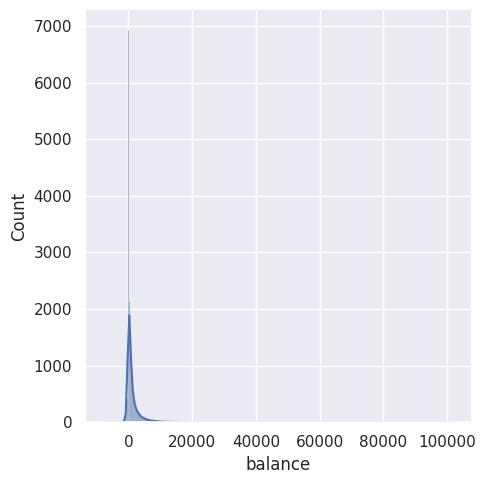

In [ ]:
sns.displot(data=numdf, x=col, kde=True)

##### iii. Measures of Dispersion

In [ ]:
## measures of dispersion:
## 1. IQR of fts
numdf.quantile(0.75) - numdf.quantile(0.25, numeric_only=True)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64

In [ ]:
## measures of dispersion:
## 2. Range of fts
print(f"Range of numerical features is \n{numdf.max()-numdf.min()}")

Range of numerical features is 
age             77
balance     110146
day             30
duration      4918
campaign        62
pdays          872
previous       275
dtype: int64


In [ ]:
## measures of dispersion:
## 3. Variance of fts
numdf.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [ ]:
## measures of dispersion:
## 4. Standard Deviation of fts
numdf.std()
# numdf.std()['age']

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [ ]:
# # box plots
# for col in num_cols:
#   fig = px.box(numdf, x=col)
#   fig.show()

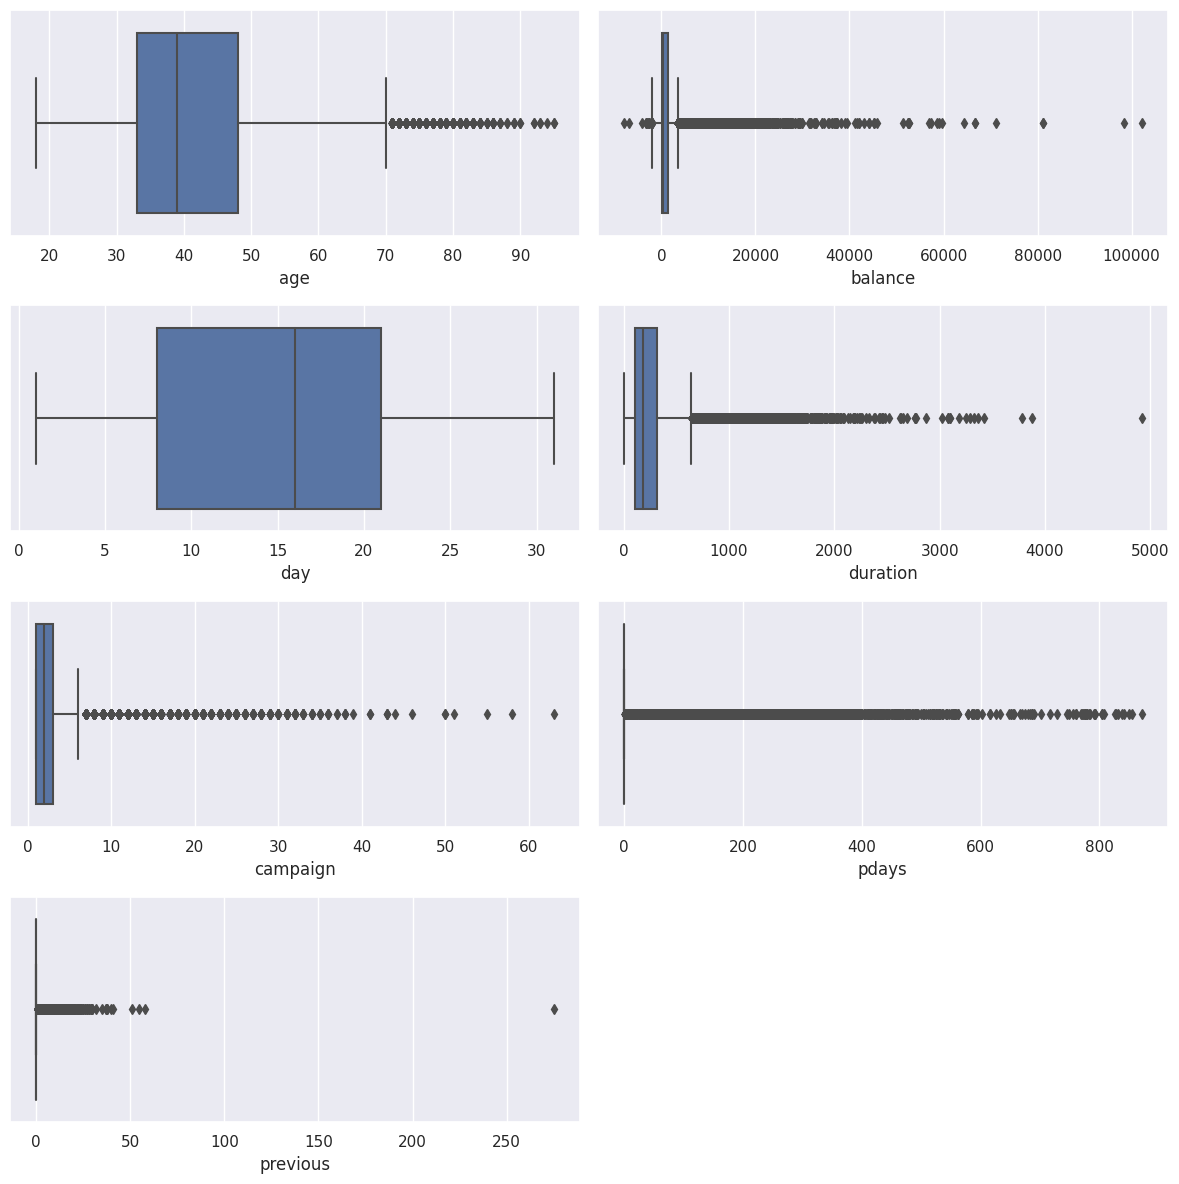

In [ ]:
import math

# Calculate the number of rows needed based on the number of columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)

# Create subplots with a layout of num_rows x 2
fig, ax = plt.subplots(num_rows, 2, figsize=(12, 12))
ax = ax.flatten()

# Loop through each numerical column and create a boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(data=numdf, x=col, ax=ax[i])

# Hide any empty subplots
for j in range(num_plots, len(ax)):
    ax[j].axis('off')

fig.tight_layout()
plt.show()

##### iv. Covariance & Correlation

In [ ]:
numdf.cov()

,age,balance,day,duration,campaign,pdays,previous
age,112.758107,3.161477e+03,-0.805979,-12.711716,0.156601,-25.260550,0.031512
balance,3161.476700,9.270599e+06,114.095467,16905.750545,-137.513232,1047.321715,116.939527
day,-0.805979,1.140955e+02,69.263609,-64.740317,4.189519,-77.535404,-0.991307
duration,-12.711716,1.690575e+04,-64.740317,66320.574090,-67.471794,-40.349073,0.713654
campaign,0.156601,-1.375132e+02,4.189519,-67.471794,9.597733,-27.492386,-0.234459
pdays,-25.260550,1.047322e+03,-77.535404,-40.349073,-27.492386,10025.765774,104.899902
previous,0.031512,1.169395e+02,-0.991307,0.713654,-0.234459,104.899902,5.305841


In [ ]:
numdf.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

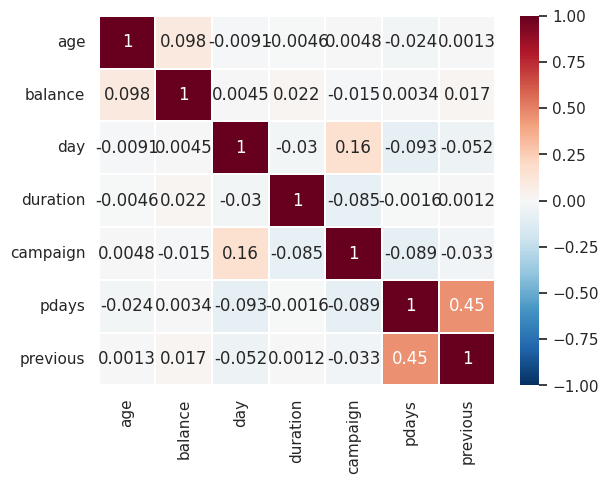

In [ ]:
# lets use diverging color scheme to highlight both highly negative as well as highly positively related features
sns.heatmap(numdf.corr(), linewidths=.1, cmap="RdBu_r", annot=True, vmin=-1, vmax=1)

**Inferences**

1. We observe that no two features are highly correlated.
2. Here let's consider, (0<=|c|<0.3: weak), (3<=|c|<0.7: moderate) & (0.7<=|c|<1: strong). <br>
So, we have moderate positive correlation between number of days that passed by after the client was last contacted from a previous campaign and the number of times the client was last contacted.

##### v. Skewness

In [ ]:
## let's see the distribution of each of the numerical columns with the default bin size

# def kde_plot(col):
#   fig = px.histogram(numdf,x=col)
#   fig.show()

def kde_plot(col):
    fig = px.histogram(numdf, x=col)
    skewness_value = np.round(numdf[col].skew(), 2)
    # Add skewness value as text annotation
    fig.add_annotation(
        text=f'Skewness: {skewness_value}',
        showarrow=False,
        font=dict(color="black", size=12),
        bgcolor="lightgrey",
        opacity=0.8
    )
    fig.show()

In [ ]:
for col in num_cols:
  kde_plot(col)

In [ ]:
# # Skewness is a measure of the asymmetry of a distribution.
# numdf.skew()

**Inferences**

- When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
- When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.
- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical
- If the skewness is between -1 and -0.5 or between 0.5 and 1, the data is moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

1. Considering above, balance, duration, campaign, pdays and previous are highly skewed features and have outliers.
2. Age has an almost Gaussian Distribution with a few outliers.


### -- Bivariate Analysis

#### i. Scatter plot + Histogram (Num vs Num)

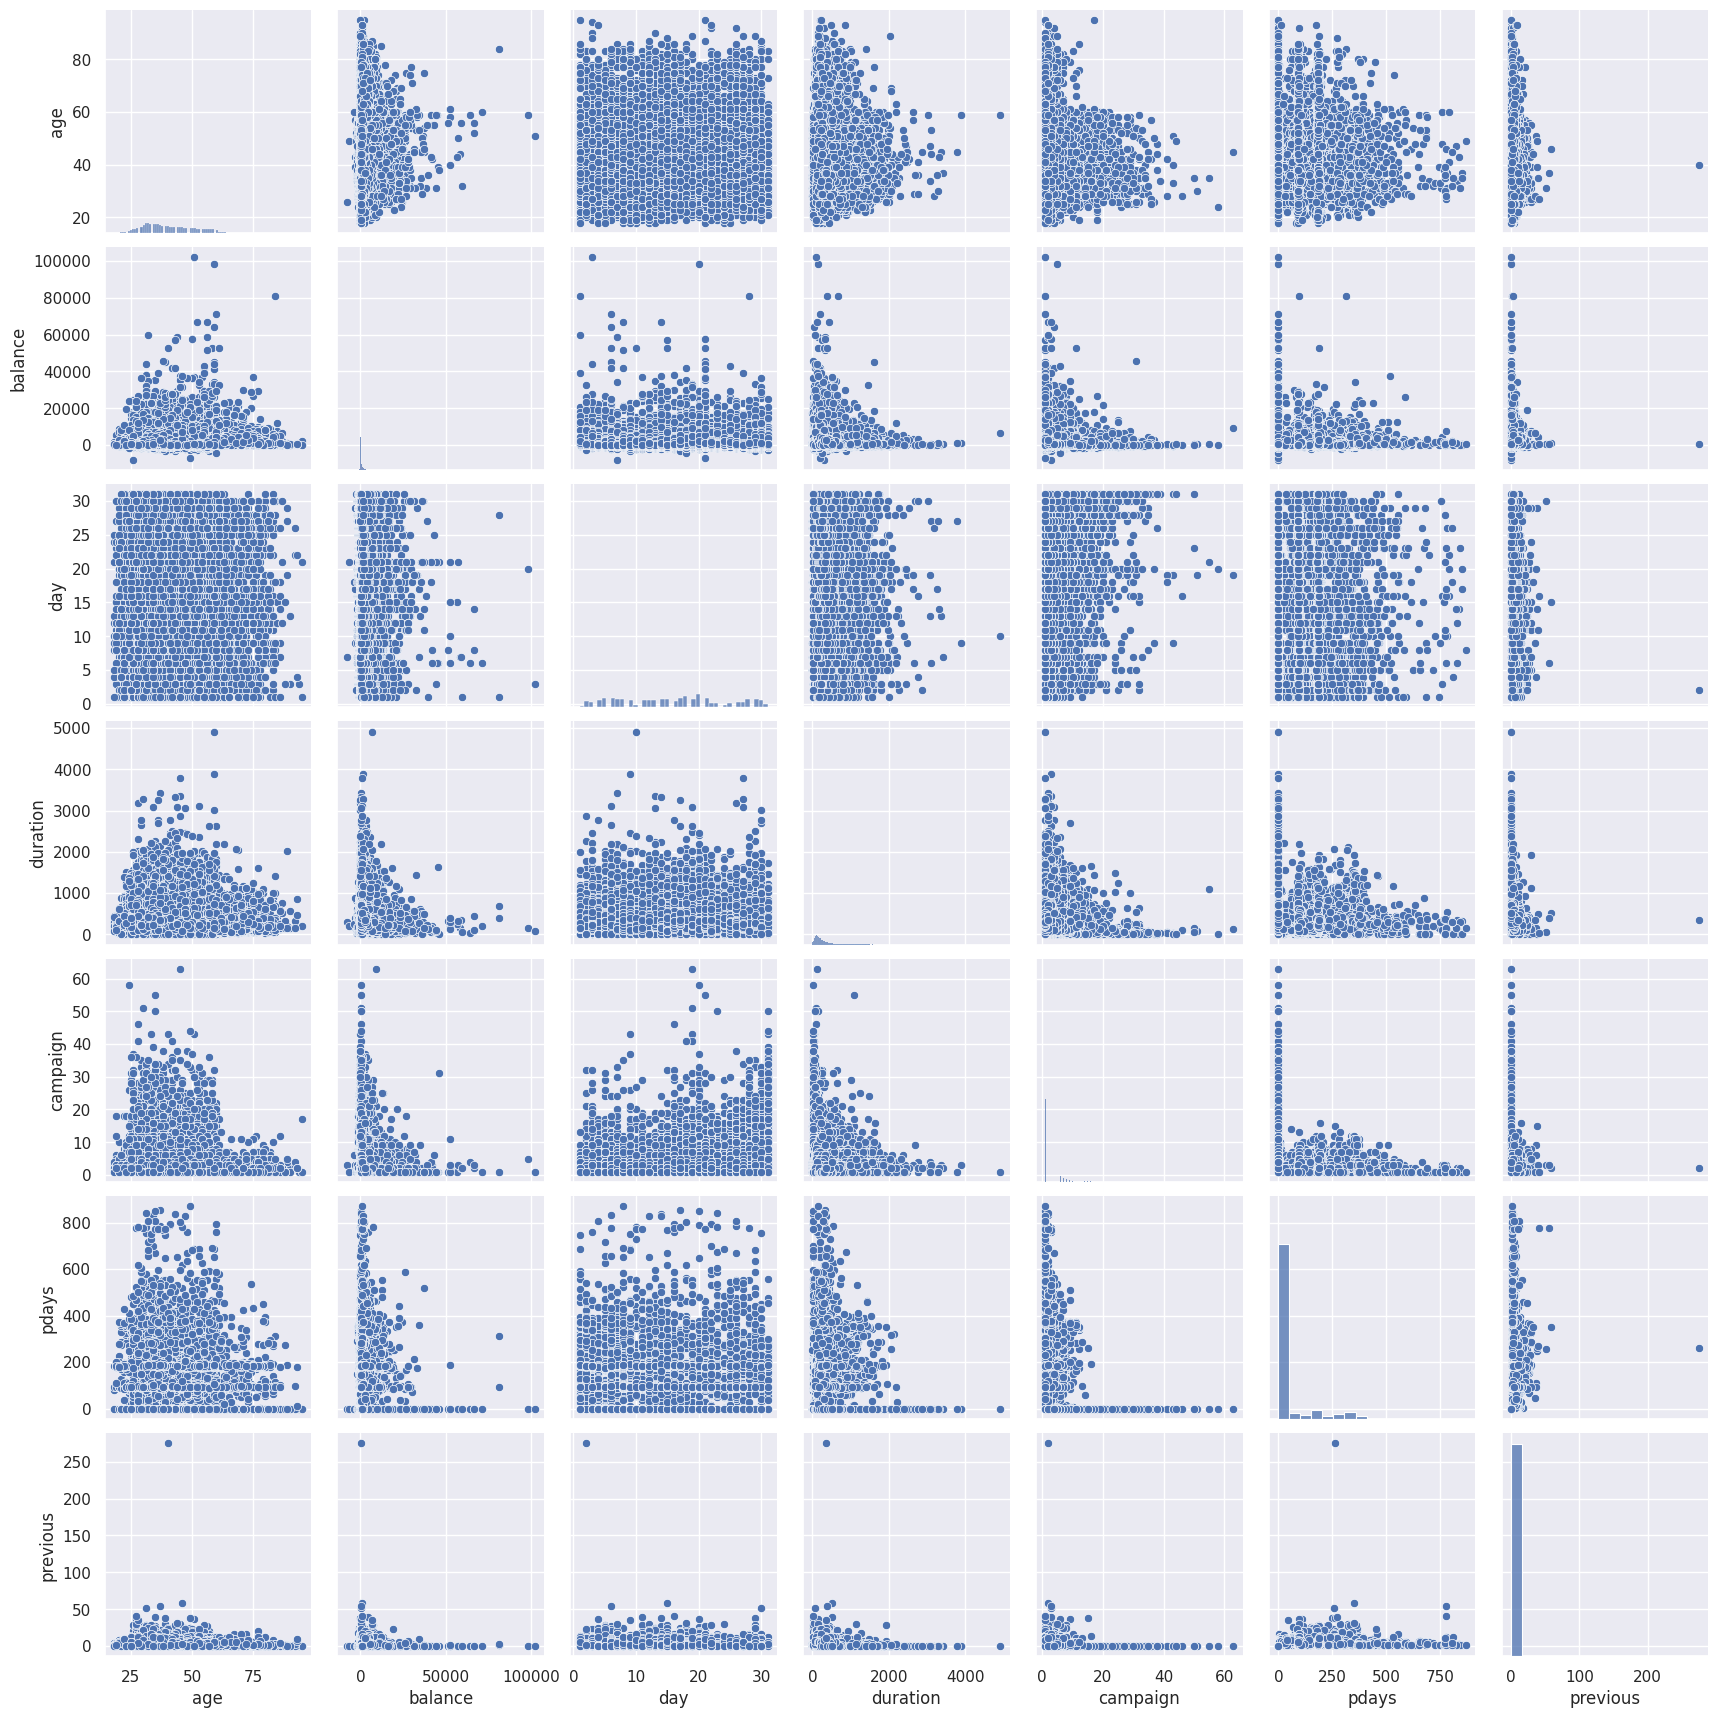

In [ ]:
sns.pairplot(numdf)

**Inferences**

1. No two numerical features show a significant linear relationship as we saw from the correlation matrix (no highly correlated features present in the data set).

#### ii. Categorical Target vs Categorical fts. : Clustered Bar Chart

In [ ]:
# def count_plot_sns(col):
#   ax = sns.countplot(data=traindf, x=col, hue="y")
#   ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#   plt.tight_layout()
#   plt.show()

## not showing colors for the grouped bar chart for some reason
# def count_plot_px(col):
#     fig = px.bar(traindf, x=col, color="y", barmode="group")
#     fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=fig.data[0].x))
#     fig.show()

In [ ]:
# for col in cat_cols:
#   count_plot_px(col)
## since plotting all at once uses up the RAM (just for plotly plots), let's plot one at a time

In [ ]:
# for col in cat_cols:
#   count_plot_sns(col)

In [ ]:
def count_plot_with_percentage(col):
  ax = sns.countplot(data=traindf, x=col, hue="y", order = traindf[col].value_counts().index)
  ax.tick_params(axis='x', rotation=60)

  # # Add percentage labels on top of the bars
  # total_height = len(traindf)
  # for p in ax.patches:
  #     height = p.get_height()
  #     percentage = height / total_height * 100
  #     ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
  #                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.tight_layout()
  plt.show()

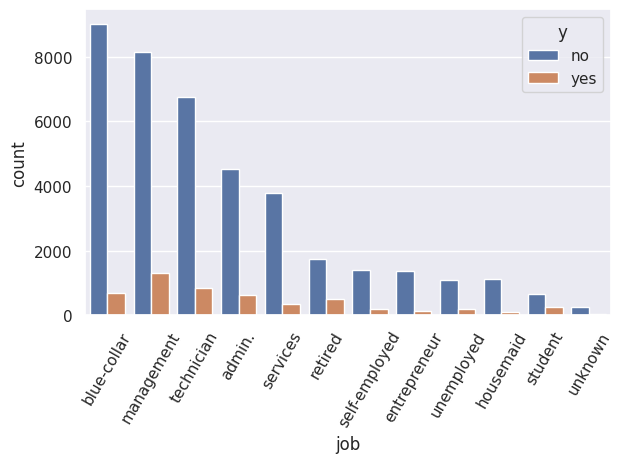

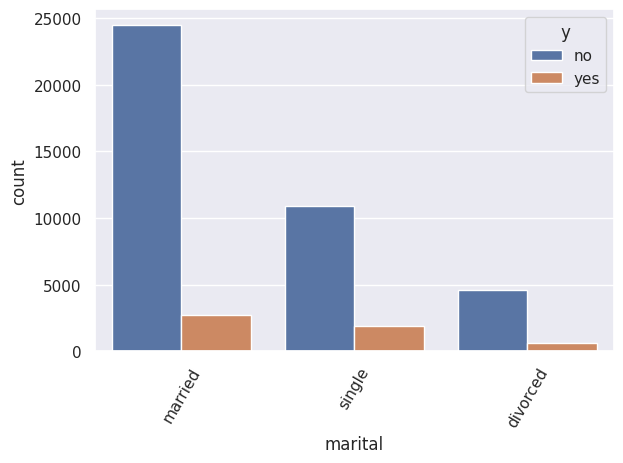

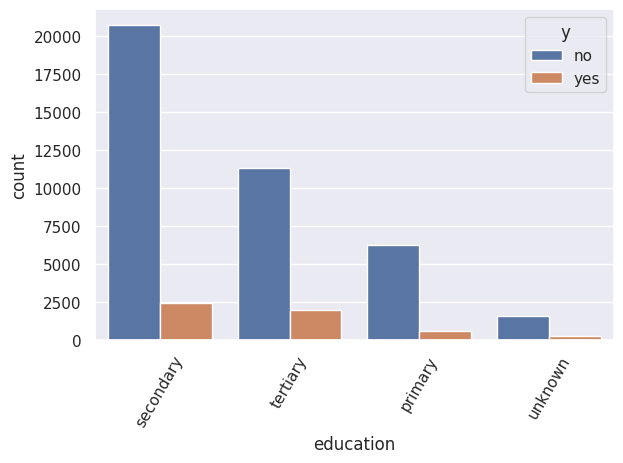

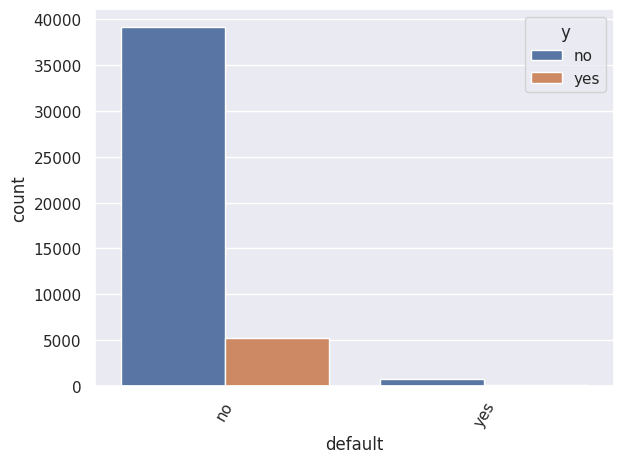

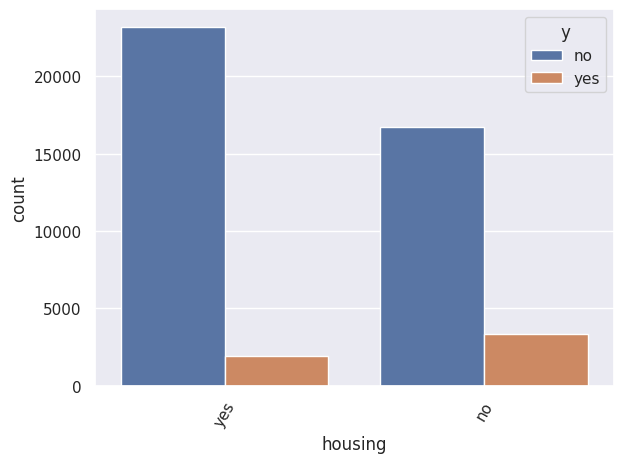

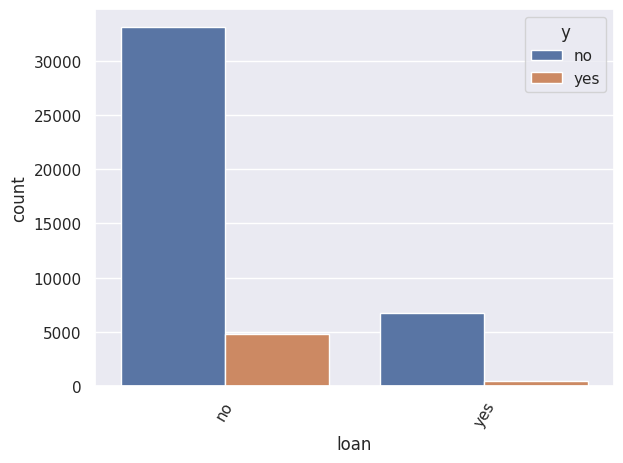

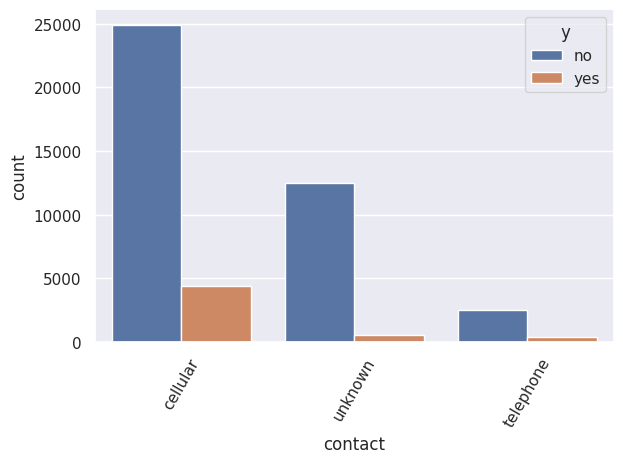

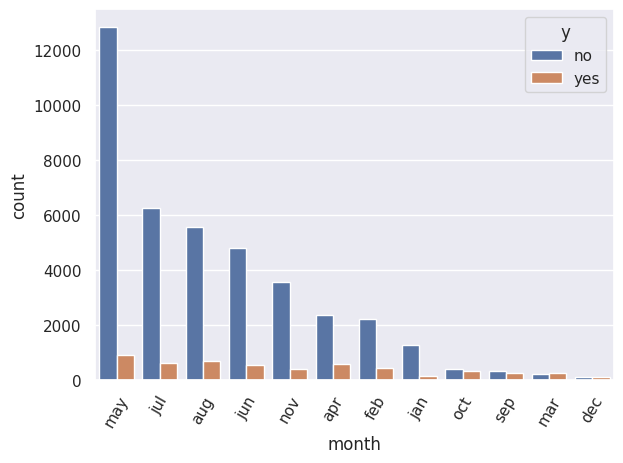

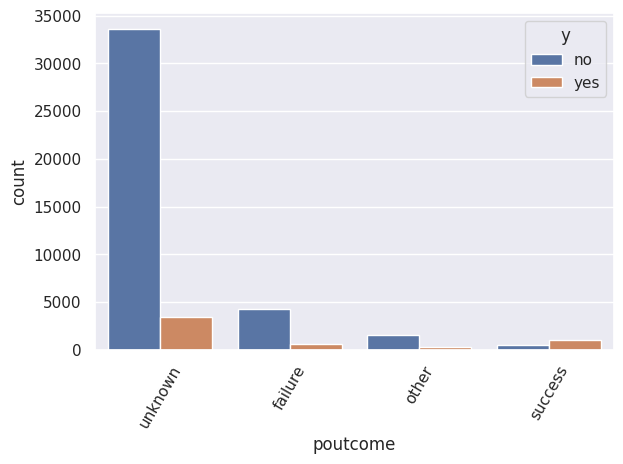

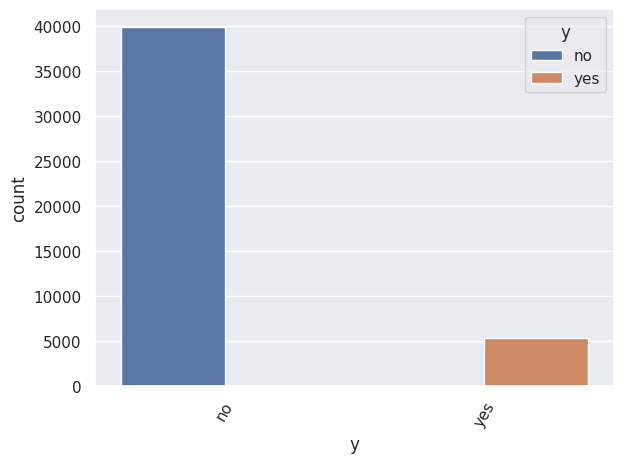

In [ ]:
for col in cat_cols:
  count_plot_with_percentage(col)

**Inferences**
- The bank was keen on approaching people with professional profiles more. Most of the term deposit takers have a high qualification compared to the rest.
- The bank was targeting the married ones first then the single ones more so than the divorced.
-

#### iii. Categorical Target vs Numerical fts. (Cat Vs Num)

In [ ]:
# # visualize the distribution within each category for each of the categorical variable
# def violin_cat_ft(col):
#   temp_df = traindf[col].value_counts().reset_index().rename(columns={'index':'Type'})
#   fig = px.violin(temp_df,x='Type',y=col,box=True,points="all")
#   fig.update_layout(title_text=f'{col} Violin Plot')
#   fig.show()
#   del temp_df

def violin_cat_ft_sns(col):
  sns.violinplot(traindf, x=col, y="y")
  plt.show()

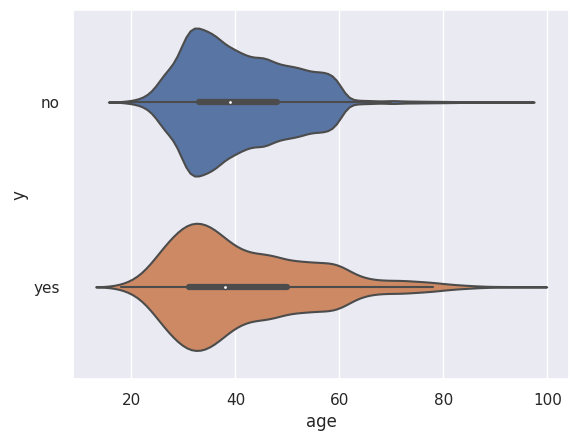

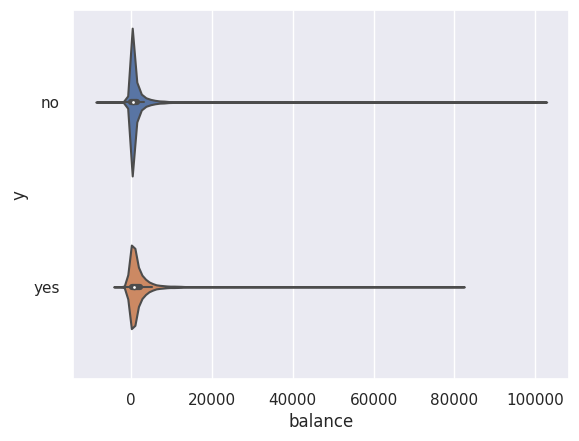

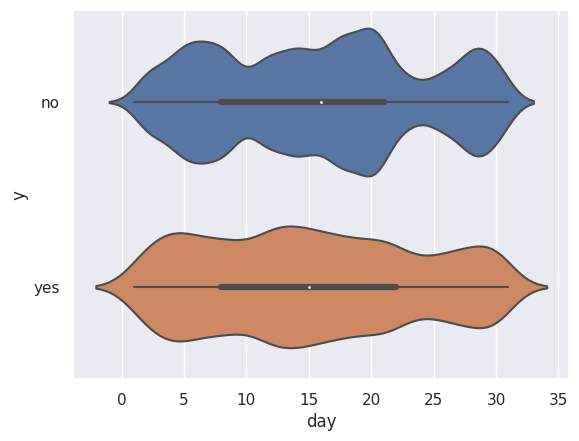

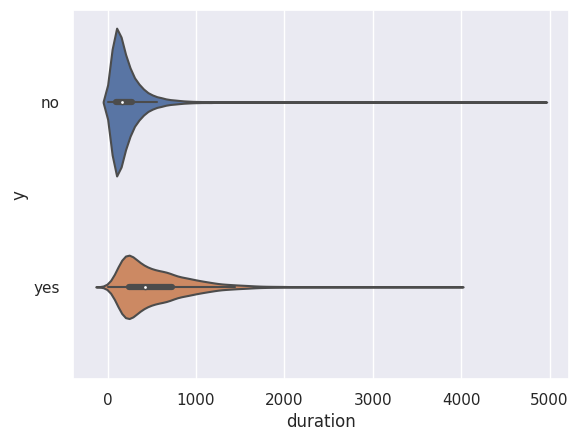

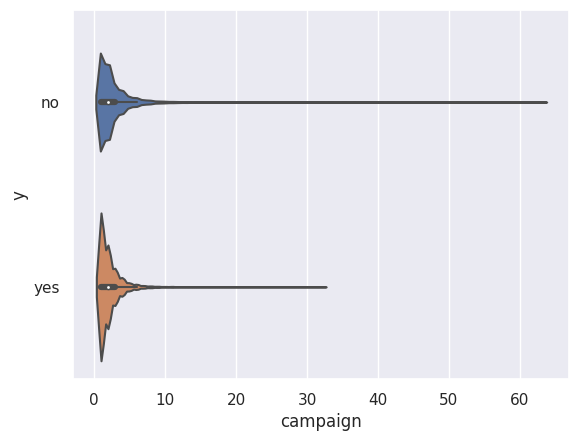

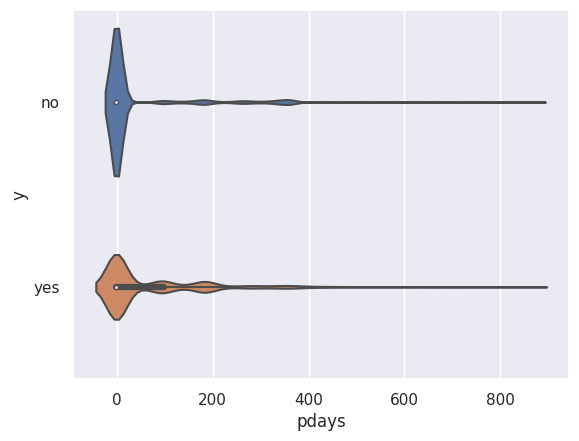

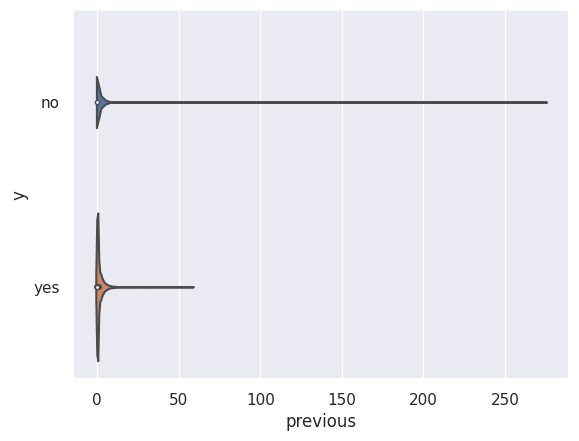

In [ ]:
for col in num_cols:
  violin_cat_ft_sns(col)